In [6]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from ydata_profiling import ProfileReport

In [2]:
df = pd.read_parquet('../assets/SINAN-TB_Brazil_cleaned.parquet')

In [3]:
df.head()

,DT_NOTIFIC,CS_SEXO,CS_RACA,TRATAMENTO,RAIOX_TORA,TESTE_TUBE,FORMA,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,...,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,SITUA_ENCE,AGRAVDROGA,AGRAVTABAC,UF,DIAS_EM_TRATAMENTO,IDADE
0,06/01/2001,Male,Ignored,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,195,66.0
1,16/01/2001,Female,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,181,35.0
2,16/01/2001,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,181,54.0
3,22/01/2001,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,181,36.0
4,03/01/2001,Female,Ignored,New case,No accomplished,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,183,14.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963961 entries, 0 to 963960
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DT_NOTIFIC          963961 non-null  object 
 1   CS_SEXO             963961 non-null  object 
 2   CS_RACA             963961 non-null  object 
 3   TRATAMENTO          963961 non-null  object 
 4   RAIOX_TORA          963961 non-null  object 
 5   TESTE_TUBE          963961 non-null  object 
 6   FORMA               963961 non-null  object 
 7   AGRAVAIDS           963961 non-null  object 
 8   AGRAVALCOO          963961 non-null  object 
 9   AGRAVDIABE          963961 non-null  object 
 10  AGRAVDOENC          963961 non-null  object 
 11  AGRAVOUTRA          963961 non-null  object 
 12  BACILOSC_E          963961 non-null  object 
 13  BACILOS_E2          963961 non-null  object 
 14  BACILOSC_O          963961 non-null  object 
 15  CULTURA_ES          963961 non-nul

In [5]:
df.describe()

,DIAS_EM_TRATAMENTO,IDADE
count,963961.000000,963961.000000
mean,204.907204,39.806045
std,103.447261,17.084546
min,0.000000,0.000000
25%,181.000000,26.000000
50%,190.000000,38.000000
75%,221.000000,52.000000
max,4909.000000,120.000000


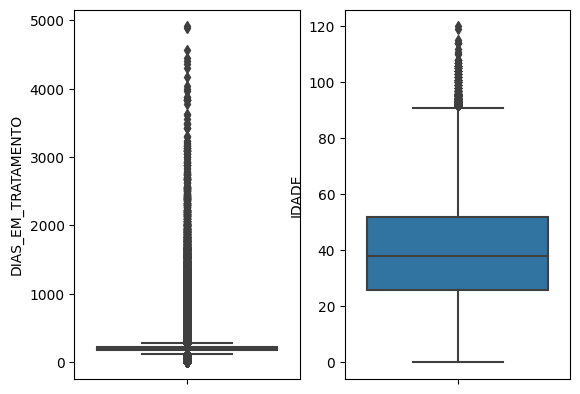

In [10]:
fig, ax = plt.subplots(1,2)

sns.boxplot(y=df['DIAS_EM_TRATAMENTO'], ax=ax[0])
sns.boxplot(y=df['IDADE'], ax=ax[1])
plt.show()

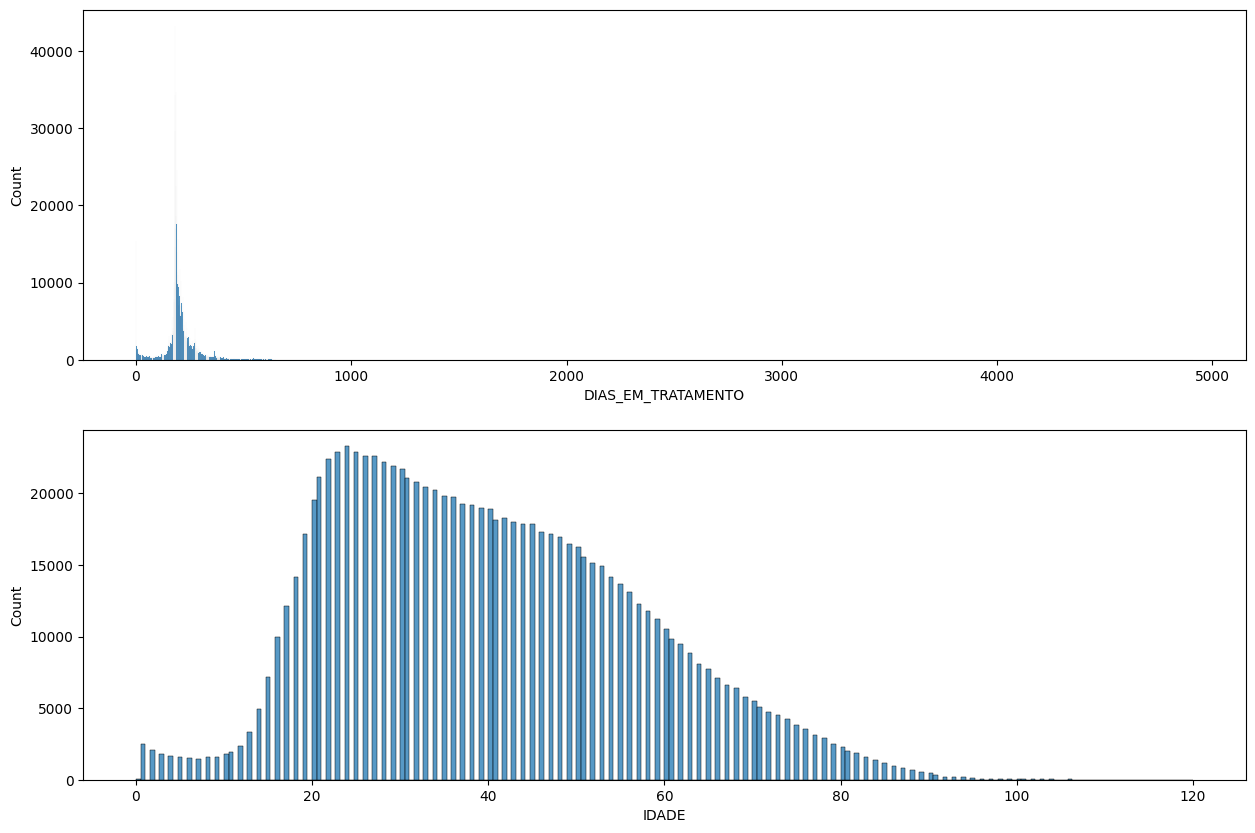

In [15]:
fig, ax = plt.subplots(2,1, figsize=(15,10))

sns.histplot(x=df['DIAS_EM_TRATAMENTO'], ax=ax[0])
sns.histplot(x=df['IDADE'], ax=ax[1])
plt.show()

In [20]:
df.query('DIAS_EM_TRATAMENTO < 600')

,DT_NOTIFIC,CS_SEXO,CS_RACA,TRATAMENTO,RAIOX_TORA,TESTE_TUBE,FORMA,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,...,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,SITUA_ENCE,AGRAVDROGA,AGRAVTABAC,UF,DIAS_EM_TRATAMENTO,IDADE
0,06/01/2001,Male,Ignored,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,195,66.0
1,16/01/2001,Female,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,181,35.0
2,16/01/2001,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,181,54.0
3,22/01/2001,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,181,36.0
4,03/01/2001,Female,Ignored,New case,No accomplished,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,183,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963956,31/07/2019,Female,Admixed,New case,Suspicious,Not performed,Pulmonary,No,No,No,...,Negative,Negative,Negative,Negative,Cured,No,No,TO,190,32.0
963957,17/08/2019,Female,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,No,No,...,Negative,Not performed,Negative,Negative,Cured,No,No,TO,214,24.0
963958,04/09/2019,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,No,No,No,...,Negative,Not performed,Not performed,Not performed,Cured,No,No,TO,196,22.0
963959,27/09/2019,Male,Admixed,New case,No accomplished,Not performed,Extrapulmonary,No,No,No,...,Not applicable,Not applicable,Not applicable,Not applicable,Cured,No,No,TO,178,15.0


In [22]:
df[df['DIAS_EM_TRATAMENTO'] < 600]

,DT_NOTIFIC,CS_SEXO,CS_RACA,TRATAMENTO,RAIOX_TORA,TESTE_TUBE,FORMA,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,...,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,SITUA_ENCE,AGRAVDROGA,AGRAVTABAC,UF,DIAS_EM_TRATAMENTO,IDADE
0,06/01/2001,Male,Ignored,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,195,66.0
1,16/01/2001,Female,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,181,35.0
2,16/01/2001,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,181,54.0
3,22/01/2001,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,181,36.0
4,03/01/2001,Female,Ignored,New case,No accomplished,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,183,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963956,31/07/2019,Female,Admixed,New case,Suspicious,Not performed,Pulmonary,No,No,No,...,Negative,Negative,Negative,Negative,Cured,No,No,TO,190,32.0
963957,17/08/2019,Female,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,No,No,...,Negative,Not performed,Negative,Negative,Cured,No,No,TO,214,24.0
963958,04/09/2019,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,No,No,No,...,Negative,Not performed,Not performed,Not performed,Cured,No,No,TO,196,22.0
963959,27/09/2019,Male,Admixed,New case,No accomplished,Not performed,Extrapulmonary,No,No,No,...,Not applicable,Not applicable,Not applicable,Not applicable,Cured,No,No,TO,178,15.0


<AxesSubplot: xlabel='DIAS_EM_TRATAMENTO', ylabel='Count'>

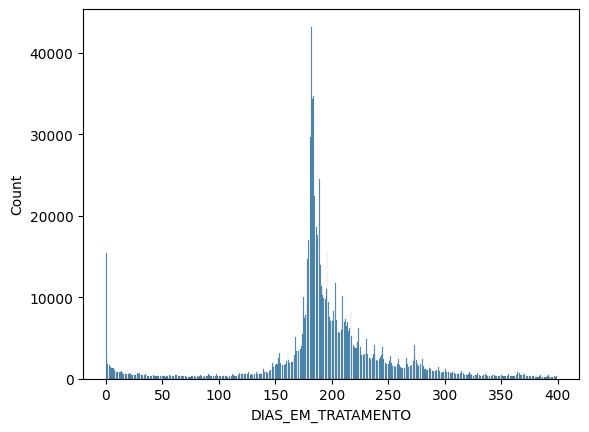

In [24]:
sns.histplot(x=df.query('DIAS_EM_TRATAMENTO < 400')['DIAS_EM_TRATAMENTO'])

In [27]:
zero_days_treat = df.query('DIAS_EM_TRATAMENTO == 0')
zero_days_treat

,DT_NOTIFIC,CS_SEXO,CS_RACA,TRATAMENTO,RAIOX_TORA,TESTE_TUBE,FORMA,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,...,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,SITUA_ENCE,AGRAVDROGA,AGRAVTABAC,UF,DIAS_EM_TRATAMENTO,IDADE
2024,20/11/2008,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,No,No,No,...,Negative,Negative,Negative,Negative,Cured,Ignored,Ignored,AC,0,11.0
2253,07/07/2009,Female,White,New case,Suspicious,Not performed,Pulmonary,No,No,No,...,Negative,Negative,Not performed,Negative,Cured,Ignored,Ignored,AC,0,35.0
4190,12/08/2014,Female,Indigenous,New case,Suspicious,Not performed,Pulmonary,No,No,No,...,Ignored,Ignored,Ignored,Ignored,Died,Ignored,Ignored,AC,0,1.0
4460,18/05/2015,Female,Admixed,New case,Suspicious,Not performed,Pulmonary,No,No,No,...,Not performed,Not performed,Not performed,Not performed,Died,No,No,AC,0,47.0
4661,26/07/2016,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,No,No,No,...,Ignored,Ignored,Ignored,Ignored,Cured,Ignored,Ignored,GO,0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963865,26/04/2019,Male,Indigenous,New case,Suspicious,Not performed,Pulmonary,No,No,No,...,Not performed,Not performed,Not performed,Not performed,Cured,No,No,TO,0,35.0
963868,02/09/2019,Male,Admixed,Relapse,Normal,Not performed,Pulmonary,No,No,No,...,Not performed,Not performed,Not performed,Not performed,Cured,No,Yes,TO,0,60.0
963875,13/09/2019,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,No,No,Yes,...,Not performed,Not performed,Not performed,Not performed,Cured,No,No,TO,0,55.0
963876,12/04/2019,Female,Admixed,New case,Suspicious,Not performed,Extrapulmonary,No,No,No,...,Not applicable,Not applicable,Not applicable,Not applicable,Cured,No,No,TO,0,37.0


In [28]:
zero_days_treat['SITUA_ENCE'].value_counts()

Cured    8299
Died     7127
Name: SITUA_ENCE, dtype: int64

In [29]:
zero_days_treat['IDADE'].describe()

count    15426.000000
mean        45.282056
std         18.159584
min          0.000000
25%         31.000000
50%         44.000000
75%         58.000000
max        107.000000
Name: IDADE, dtype: float64